In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-13 16:05:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  9.14MB/s    in 9.8s    

2021-06-13 16:06:11 (6.88 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [ ]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
       rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                                
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/30
25/25 - 7s - loss: 0.4851 - accuracy: 0.8000 - val_loss: 0.4932 - val_accuracy: 0.8000
Epoch 2/30
25/25 - 7s - loss: 0.4839 - accuracy: 0.7500 - val_loss: 0.4439 - val_accuracy: 0.8000
Epoch 3/30
25/25 - 7s - loss: 0.5054 - accuracy: 0.7400 - val_loss: 0.4446 - val_accuracy: 0.8500
Epoch 4/30
25/25 - 7s - loss: 0.5045 - accuracy: 0.7500 - val_loss: 0.6096 - val_accuracy: 0.6000
Epoch 5/30
25/25 - 7s - loss: 0.5917 - accuracy: 0.7300 - val_loss: 0.5767 - val_accuracy: 0.7000
Epoch 6/30
25/25 - 7s - loss: 0.5540 - accuracy: 0.7700 - val_loss: 0.5220 - val_accuracy: 0.6500
Epoch 7/30
25/25 - 7s - loss: 0.4664 - accuracy: 0.7700 - val_loss: 0.4755 - val_accuracy: 0.7000
Epoch 8/30
25/25 - 7s - loss: 0.4729 - accuracy: 0.7800 - val_loss: 0.4636 - val_accuracy: 0.7500
Epoch 9/30
25/25 - 7s - loss: 0.6028 - accuracy: 0.7500 - val_loss: 0.6819 - val_accuracy: 0.6000
Epoch 10/30
25/25 - 7s - loss: 0.6217 - accuracy: 0.5600 - val_loss: 0.5602 - val_accuracy: 0.7000
Epoch 11/30
25/25 -

Saving image.jpg to image (2).jpg
image.jpg
clean


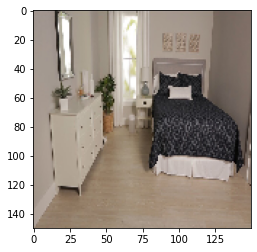

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predict image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')